## ESCUELA SUPERIOR POLITÉCNICA DEL LITORAL

 Notebook: Pregunta 2:
La presencia de universidades en una provincia genera dinámica en la cantidad de empleados y la cantidad de empresas en esas localidades?

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
universidades = pd.read_csv('Data/universidades.csv', sep=';', encoding='latin')
universidades.head()

,DENOMINACION,FINANCIAMIENTO,CATEGORIA,NOMBRE AUTORIDAD,TELEFONO INSTITUCIONAL,CORREO ELECTRONICO,PROVINCIA,CIUDAD,DIRECCION
0,ESCUELA POLITECNICA\nNACIONAL,PUBLICA,A,JAIME ALFONSO\nCALDERON SEGOVIA,2507144 / 2508959,correo.general@epn.edu.ec,PICHINCHA,QUITO,LADRON DE GUEVARA E-11-\n253
1,ESCUELA SUPERIOR POLITECNICA DE CHIMBORAZO,PUBLICA,B,ROSA ELENA PINOS NEIRA,03 2 998-200,info@live.espoch.edu.ec,CHIMBORAZO,RIOBAMBA,PANAMERICANA SUR KM1 1/2 RIOBAMBA ECUADOR
2,ESCUELA SUPERIOR POLITECNICA AGROPECUARIA DE M...,PUBLICA,C,QUINCHE LEONARDO FELIX LOPEZ,"05-2 685-134/156 , ext.\n114, 115; 5-2685048/035",espam@espam.edu.ec,MANABI,CALCETA,10 DE AGOSTO 82 Y GRANDA CENTENO
3,UNIVERSIDAD CENTRAL DEL ECUADOR,PUBLICA,B,FERNANDO EFRAIN SEMPERTEGUI ONTANEDA,2226080 /2521-590,rectorado@ucee.edu.ec; fercempt@viociencias.ce...,PICHINCHA,QUITO,"CIUDADELA UNIVERSITARIA, AV. AMERICA Y PEREZ G..."
4,UNIVERSIDAD DE GUAYAQUIL,PUBLICA,D,HECTOR ROBERTO CASSIS MARTINEZ,"04 2281559, 2296580",ugrector@uge.edu.ec,GUAYAS,GUAYAQUIL,"CIUDADELA UNIVERSITARIA, SALVADOR ALLENDE Y MA..."


In [191]:
universidades.shape

(59, 9)

In [8]:
empresas = pd.read_csv('Data/rankingCVSV.csv',sep=';', encoding='latin')
empresas.head()


C:\Users\danny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,2020,2019,EXPEDIENTE,NOMBRE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,TAMAÑO,SECTOR,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020
0,1.0,1,384.0,CORPORACION FAVORITA C.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,MERCADO DE VALORES,"10,768.00","2,121,860,458.59","1,482,973,135.","2,170,602,774.","187,168,402.3","220,198,120.31","147,499,234.25","41,971,212.00","2,170,602,774.93"
1,2.0,4,6796.0,ECUACORRIENTE S.A.,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,GRANDE,SOCIETARIO,966.00,"1,607,423,376.00","568,986,647.0",0.00,"-1,387,158.70",0.00,"-2,633,855.70","1,246,697.02",0.00
2,3.0,3,93144.0,AURELIAN ECUADOR S.A,ANÓNIMA,B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...,ORIENTE,ZAMORA CHINCHIPE ...,LOS ENCUENTROS ...,GRANDE,SOCIETARIO,"1,451.00","1,599,727,165.00","605,293,529.0","358,792,587.0","-49,399,080.0","-49,399,080.00","-49,399,080.00",0.00,"358,823,965.00"
3,4.0,2,705547.0,SHAYA ECUADOR S.A.,ANÓNIMA,B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,92.00,"1,354,952,445.00","786,817,297.0","669,076,072.0","179,317,070.0","210,961,259.00","133,709,258.00","45,607,812.10","669,076,072.00"
4,5.0,5,47845.0,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES S....,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,SOCIETARIO,"2,844.00","1,217,718,379.00","264,709,114.0","1,066,241,897.","174,644,376.0","204,823,940.00","106,826,750.00","67,817,626.00","1,071,561,214.00"


#### Buscaremos la cantidad de empresas por provincia

In [42]:
df_empcan=empresas['PROVINCIA'].value_counts()
df_empcan.drop(['nan'],axis=0)

GUAYAS                            30544
PICHINCHA                         23631
AZUAY                              3925
MANABI                             3161
EL ORO                             2534
TUNGURAHUA                         1434
LOJA                               1091
LOS RIOS                           1033
SANTO DOMINGO DE LOS TSACHILAS      920
COTOPAXI                            876
IMBABURA                            866
CHIMBORAZO                          792
SANTA ELENA                         726
SUCUMBIOS                           557
ZAMORA CHINCHIPE                    553
CAÑAR                               515
ORELLANA                            464
ESMERALDAS                          451
GALAPAGOS                           391
MORONA SANTIAGO                     374
CARCHI                              283
NAPO                                220
PASTAZA                             175
BOLIVAR                             169
Name: PROVINCIA, dtype: int64

In [17]:
# corregir informacion de las provincias
def clean_provincia(row):
    if(row == 'SANTO DOMINGO DE LOS '):
        return "SANTO DOMINGO DE LOS TSACHILAS"
    if(row == 'TSACHILAS                    '):
        return "SANTO DOMINGO DE LOS TSACHILAS"
    return str(row).rstrip()

empresas['PROVINCIA'] = empresas['PROVINCIA'].apply(clean_provincia)

#### Buscaremos la cantidad de empleados por provincia

In [29]:
empresas['EMPLEADOS'] = empresas['CANT. EMPLEADOS'].str.replace(',','')
empresas['EMPLEADOS'] = pd.to_numeric(empresas['EMPLEADOS'])
empresas['EMPLEADOS'].sum()

1433576.0

In [40]:
df_empem=empresas[["PROVINCIA", "EMPLEADOS",'NOMBRE']].groupby("PROVINCIA").sum()
df_empem.drop(['nan'],axis=0)

,EMPLEADOS
PROVINCIA,
AZUAY,58934.0
BOLIVAR,1335.0
CARCHI,12319.0
CAÑAR,9600.0
CHIMBORAZO,106505.0
COTOPAXI,11987.0
EL ORO,35624.0
ESMERALDAS,4316.0
GALAPAGOS,2892.0


#### Cantidad de universidaes por provincia

In [38]:
df_uni=universidades['PROVINCIA'].value_counts()

In [39]:
df_uni

PICHINCHA      16
GUAYAS         13
MANABI          5
AZUAY           4
IMBABURA        3
TUNGURAHUA      3
LOJA            2
CHIMBORAZO      2
LOS RIOS        2
SANTA ELENA     1
EL ORO          1
COTOPAXI        1
NAPO            1
BOLIVAR         1
PASTAZA         1
CAÑAR           1
ESMERALDAS      1
CARCHI          1
Name: PROVINCIA, dtype: int64

#### Merge entre los dos dataframes para tener la cantidad de

In [54]:
df1 = pd.DataFrame(df_empcan)
df1.rename(columns={'PROVINCIA':'CANT EMPRESAS'},inplace=True)
df1.drop(['nan'],axis=0)

,CANT EMPRESAS
GUAYAS,30544
PICHINCHA,23631
AZUAY,3925
MANABI,3161
EL ORO,2534
TUNGURAHUA,1434
LOJA,1091
LOS RIOS,1033
SANTO DOMINGO DE LOS TSACHILAS,920
COTOPAXI,876


In [98]:
df2 = pd.DataFrame(df_uni)
df2.rename(columns={'PROVINCIA':'UNIVERSIDADES'},inplace=True)
df2

,UNIVERSIDADES
PICHINCHA,16
GUAYAS,13
MANABI,5
AZUAY,4
IMBABURA,3
TUNGURAHUA,3
LOJA,2
CHIMBORAZO,2
LOS RIOS,2
SANTA ELENA,1


In [69]:
df1=df1.merge(df_empem,left_index=True, right_index=True)
df1.drop(['nan'],axis=0)

,CANT EMPRESAS,EMPLEADOS
GUAYAS,30544,523236.0
PICHINCHA,23631,466538.0
AZUAY,3925,58934.0
MANABI,3161,57662.0
EL ORO,2534,35624.0
TUNGURAHUA,1434,16072.0
LOJA,1091,8257.0
LOS RIOS,1033,16103.0
SANTO DOMINGO DE LOS TSACHILAS,920,9130.0
COTOPAXI,876,11987.0


In [83]:
df1 = df1.rename_axis('PROVINCIA').reset_index()

In [117]:
df1

,PROVINCIA,CANT EMPRESAS,EMPLEADOS
0,GUAYAS,30544,523236.0
1,PICHINCHA,23631,466538.0
2,AZUAY,3925,58934.0
3,nan,3359,0.0
4,MANABI,3161,57662.0
5,EL ORO,2534,35624.0
6,TUNGURAHUA,1434,16072.0
7,LOJA,1091,8257.0
8,LOS RIOS,1033,16103.0
9,SANTO DOMINGO DE LOS TSACHILAS,920,9130.0


In [99]:
df2 = df2.rename_axis('PROVINCIA').reset_index()

In [116]:
df2

,PROVINCIA,UNIVERSIDADES
0,PICHINCHA,16
1,GUAYAS,13
2,MANABI,5
3,AZUAY,4
4,IMBABURA,3
5,TUNGURAHUA,3
6,LOJA,2
7,CHIMBORAZO,2
8,LOS RIOS,2
9,SANTA ELENA,1


In [152]:
df = pd.merge(df1,df2,how='outer')


In [154]:
df.fillna({'UNIVERSIDADES': 0}, inplace=True)
df

,PROVINCIA,CANT EMPRESAS,EMPLEADOS,UNIVERSIDADES
0,GUAYAS,30544,523236.0,13.0
1,PICHINCHA,23631,466538.0,16.0
2,AZUAY,3925,58934.0,4.0
3,nan,3359,0.0,0.0
4,MANABI,3161,57662.0,5.0
5,EL ORO,2534,35624.0,1.0
6,TUNGURAHUA,1434,16072.0,3.0
7,LOJA,1091,8257.0,2.0
8,LOS RIOS,1033,16103.0,2.0
9,SANTO DOMINGO DE LOS TSACHILAS,920,9130.0,0.0


In [155]:
df = df.convert_dtypes()
df.dtypes

PROVINCIA        string
CANT EMPRESAS     Int64
EMPLEADOS         Int64
UNIVERSIDADES     Int64
dtype: object

In [157]:
df = df.drop(3)

In [158]:
df

,PROVINCIA,CANT EMPRESAS,EMPLEADOS,UNIVERSIDADES
0,GUAYAS,30544,523236,13
1,PICHINCHA,23631,466538,16
2,AZUAY,3925,58934,4
4,MANABI,3161,57662,5
5,EL ORO,2534,35624,1
6,TUNGURAHUA,1434,16072,3
7,LOJA,1091,8257,2
8,LOS RIOS,1033,16103,2
9,SANTO DOMINGO DE LOS TSACHILAS,920,9130,0
10,COTOPAXI,876,11987,1


In [159]:
import seaborn as sns

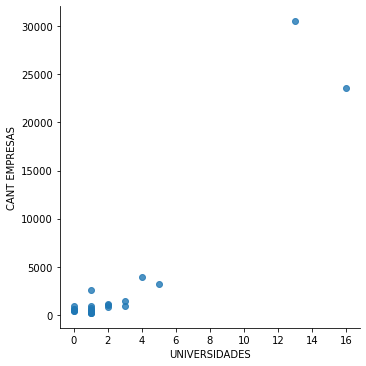

In [166]:
sns.lmplot('UNIVERSIDADES', 'CANT EMPRESAS', data=df, fit_reg=False)

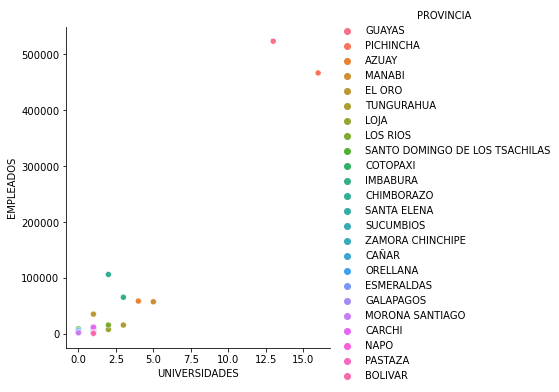

In [186]:
sns.relplot(x="UNIVERSIDADES", y="EMPLEADOS", hue="PROVINCIA", data=df);

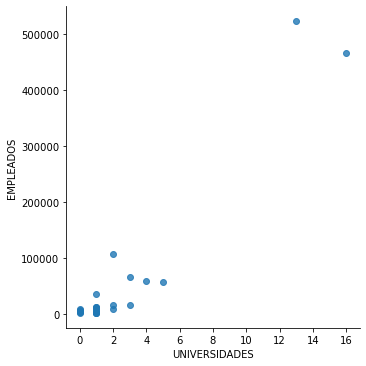

In [188]:
sns.lmplot('UNIVERSIDADES', 'EMPLEADOS', data=df, fit_reg=False)

In [175]:
df3 = df.loc[df["UNIVERSIDADES"] < 10]

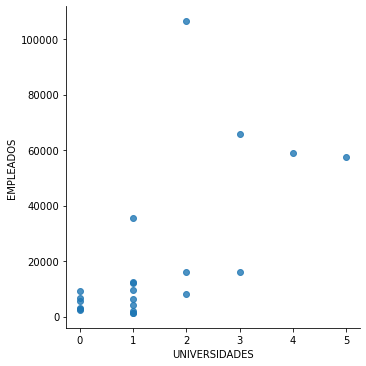

In [177]:
sns.lmplot('UNIVERSIDADES', 'EMPLEADOS', data=df3, fit_reg=False)

C:\Users\danny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


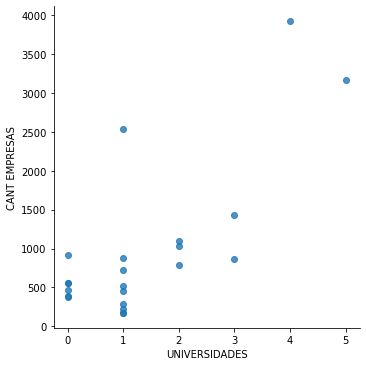

In [182]:
sns.lmplot('UNIVERSIDADES', 'CANT EMPRESAS', data=df3, fit_reg=False)

<AxesSubplot:xlabel='UNIVERSIDADES', ylabel='EMPLEADOS'>

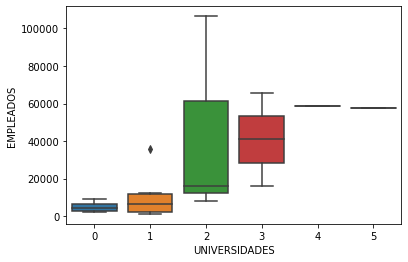

In [178]:
sns.boxplot(x="UNIVERSIDADES", y="EMPLEADOS", data=df3)

In [179]:
df4 = df.loc[df["UNIVERSIDADES"] > 10]

C:\Users\danny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


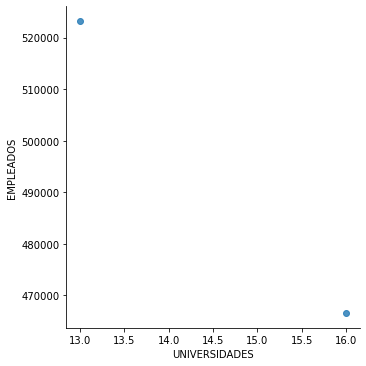

In [180]:
sns.lmplot('UNIVERSIDADES', 'EMPLEADOS', data=df4, fit_reg=False)

<AxesSubplot:xlabel='UNIVERSIDADES', ylabel='EMPLEADOS'>

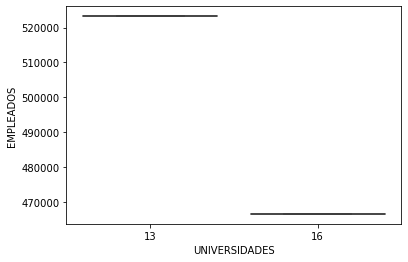

In [181]:
sns.boxplot(x="UNIVERSIDADES", y="EMPLEADOS", data=df4)